In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [2]:
data = pd.read_csv('uci-news-aggregator.csv')
data=data.sample(frac=1)

In [3]:
data

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
179838,180174,WHO declares polio public emergency,http://news.ninemsn.com.au/health/2014/05/06/0...,Ninemsn,m,d7ih6q0enIHXz0Mrn9WsAs5i494-M,news.ninemsn.com.au,1399327338789
386566,387026,"Mattel, Inc. Shares Fall 10% on Plunging Q2 Ea...",http://www.fool.com/investing/general/2014/07/...,Motley Fool,b,djVVQwds486L1jMebWSGQQ3ykQlXM,www.fool.com,1405611833080
213317,213763,Japan's High Court Rules that Apple's iPhone 4...,http://www.patentlyapple.com/patently-apple/20...,Patently Apple,t,d_TPCK7BiHMWTPM5FlTIWSFjnBdDM,www.patentlyapple.com,1400385471875
288215,288675,Warm-blooded? Cold-blooded? Dinosaurs were app...,http://www.theweathernetwork.com/news/articles...,The Weather Network,t,d6t37QpHNK_WrJMRANykM28sjpJlM,www.theweathernetwork.com,1402863564491
13191,13192,Global Markets Overview – 3/17/14,http://au.ibtimes.com/articles/543517/20140317...,International Business Times AU,b,d-fS70CRDM7tVXMmqQCeLIbVI1-yM,au.ibtimes.com,1395058708918
103800,103997,Trinity Church in Waltham offers Holy Week ser...,http://waltham.wickedlocal.com/article/2014041...,Wicked Local Waltham,e,dJuzZfIa0RoI_JMKZCBfLaEa_N1GM,waltham.wickedlocal.com,1397300099063
132354,132690,Nearly one-fifth of China's farmland polluted ...,http://www.ctvnews.ca/sci-tech/nearly-one-fift...,CTV News,b,dhvaxJy9LxD_cJMf6Ihtdgblu0QYM,www.ctvnews.ca,1397827671238
19279,19280,Bryan Adams: L'Wren was a true talent,http://www.tv3.ie/entertainment_article.php\?l...,TV3.ie,e,duoVlmDbjSvmjhM6ulaqJqHcgdYQM,www.tv3.ie,1395165321351
176440,176776,France sticks to 2015 deficit target despite E...,http://www.globalpost.com/dispatch/news/thomso...,GlobalPost,b,dkL4oqsDgWfQhgMHeU_1tJgJbPVYM,www.globalpost.com,1399308502887
26875,26876,The Rolling Stones Rally Around Grieving Mick ...,"http://www.people.com/people/article/0,,207982...",People Magazine,e,dwbV-O_ORBq1KMMDp6GyLFnZNBdYM,www.people.com,1395330013583


In [3]:
# Load Google's pre-trained Word2Vec model.
w2vmodel = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

In [7]:
#w2vmodel.wv.most_similar(positive='compute')

In [4]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        #if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
        result.append(token) #(lemmatize_stemming(token))
    return result

In [5]:
data.shape[0]

422419

In [6]:
featX = np.zeros((data.shape[0], 300), dtype=float)
featY = np.zeros((data.shape[0]), dtype = str)
idx = 0
for index,row in data.iterrows():
    title = row[1]
    title = preprocess(title)
    vec = np.zeros(300,dtype=float)
    for w in title:
        # Get the embedding for word w
        if w not in w2vmodel: continue
        vec = w2vmodel[w]
        featX[idx] += vec
    # Average the feature vector by the length of the title
    if len(title) != 0: featX[idx] = featX[idx]/float(len(title))
        
    # Create the label for these feature vectors
    featY[idx] = row[4]
    if featY[idx] == 'b': featY[idx] = 0
    if featY[idx] == 'e': featY[idx] = 1
    if featY[idx] == 'm': featY[idx] = 2
    if featY[idx] == 't': featY[idx] = 3
    idx += 1
    #if idx == 5:break

In [7]:
(featX[0])

array([-0.02630615, -0.0300293 ,  0.0088501 ,  0.02037048,  0.03564453,
       -0.18145752, -0.04735947, -0.06555176,  0.18920898,  0.05145264,
       -0.01916504, -0.03009033,  0.01147461,  0.05435181, -0.128479  ,
        0.16479492,  0.04096985,  0.11962891,  0.03390503,  0.12838745,
        0.04382324, -0.04217529, -0.2019043 ,  0.05545044, -0.13525391,
       -0.06781006, -0.10400391,  0.1544342 , -0.12335205, -0.02307129,
       -0.10961914,  0.08361816,  0.05395508, -0.10998535,  0.03173828,
        0.00323486, -0.0413208 ,  0.09942627,  0.1036377 ,  0.09997559,
        0.00622559, -0.07629395, -0.05236816,  0.12817383,  0.05969238,
       -0.18212891,  0.08101559,  0.07067871, -0.05337524,  0.21457291,
       -0.06213379,  0.00735474,  0.03222656, -0.06079102, -0.07899475,
       -0.08001709, -0.06311035, -0.02844238, -0.03967285,  0.034729  ,
       -0.00378418,  0.10583496, -0.0246582 , -0.01678467, -0.00387573,
        0.13439941, -0.08105469,  0.19854736, -0.05767822, -0.08

In [21]:
X_train = featX[:300000]
y_train = featY[:300000]
X_vaildate = featX[300000:350000]
y_validate = featY[300000:350000]
X_test= featX[350000:]
y_test=featY[350000:]

In [10]:
featY[50000:50030]

array(['3', '3', '2', '3', '1', '1', '2', '2', '3', '3', '1', '1', '3',
       '1', '0', '1', '3', '1', '1', '1', '3', '0', '0', '0', '3', '2',
       '2', '3', '2', '3'], dtype='|S1')

In [ ]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_validate)

In [107]:
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 

In [11]:
from sklearn.neighbors import KNeighborsClassifier


In [12]:
knn = KNeighborsClassifier(n_neighbors=7)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [ ]:
knn.score(X_test,y_test)

In [ ]:
knn.predict(X_test[0])

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

In [22]:
y_predict = model.predict(X_test)

In [23]:
y_test

array(['0', '2', '3', ..., '2', '1', '1'], dtype='|S1')

In [24]:
error=0
for i in range(len(y_test)):
    if(y_test[i]!=y_predict[i]):
        error+=1
print error
    

10708


In [25]:
len(y_test)

72419

In [26]:
1-(10708/72419.0)

0.8521382510114749

In [27]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train)

In [28]:
accuracy = gnb.score(X_test, y_test) 
print accuracy

0.7668015299852249


In [29]:
gnb.predict(X_test)

array(['0', '1', '3', ..., '2', '1', '1'], dtype='|S1')

In [30]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

In [31]:
dtree_predictions = dtree_model.predict(X_test)

In [34]:
error=0
for i in range(len(y_test)):
    if(y_test[i]!=dtree_predictions[i]):
        error+=1
print error
    

35393


In [33]:
dtree_predictions

array(['0', '1', '3', ..., '3', '1', '1'], dtype='|S1')

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# pull the data into vectors
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data['TITLE'])

# for Tfidf (we have tried and the results aren't better)
#tfidf = TfidfVectorizer()
#x = tfidf.fit_transform(dataset['TEXT'].values)

encoder = LabelEncoder()
y = encoder.fit_transform(data['CATEGORY'])

# split into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train = x[:300000]
y_train = y[:300000]
X_vaildate = x[300000:350000]
y_validate = y[300000:350000]
X_test= x[350000:]
y_test=y[350000:]

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(337935, 54637)
(300000,)
(84484, 54637)
(72419,)


In [47]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
nb.score(X_test, y_test)

0.925254422182024

In [41]:
print x[0]

  (0, 40792)	1
  (0, 39846)	1
  (0, 24129)	1
  (0, 13905)	1


In [45]:
x[100:]

<422319x54637 sparse matrix of type '<type 'numpy.int64'>'
	with 3747022 stored elements in Compressed Sparse Row format>

In [51]:
nb.predict(X_test)

array([0, 1, 3, ..., 2, 1, 1])

In [52]:
from sklearn.multiclass import OneVsRestClassifier

In [53]:
clf1 = OneVsRestClassifier(LogisticRegression())
clf1.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [54]:
print("Accuracy: {}".format(clf1.score(X_test, y_test)))

Accuracy: 0.947265220453


In [55]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [57]:
category = data.groupby("CATEGORY")

In [60]:
category.describe().head

<bound method DataFrame.head of                 ID                                                             \
             count           mean            std     min        25%       50%   
CATEGORY                                                                        
b         115967.0  210544.533911  122425.665139     1.0  101845.50  211931.0   
e         152469.0  211261.873692  121905.693181  2170.0  108956.00  210088.0   
m          45639.0  216210.545520  124515.779549  4208.0  100603.50  219209.0   
t         108344.0  211016.861958  120960.405488   945.0  106123.75  213505.5   

                              TIMESTAMP                              \
                75%       max     count          mean           std   
CATEGORY                                                              
b         311176.50  418875.0  115967.0  1.400444e+12  3.726148e+09   
e         320453.00  422235.0  152469.0  1.400419e+12  3.745640e+09   
m         326432.50  422937.0   45639.0  1.40

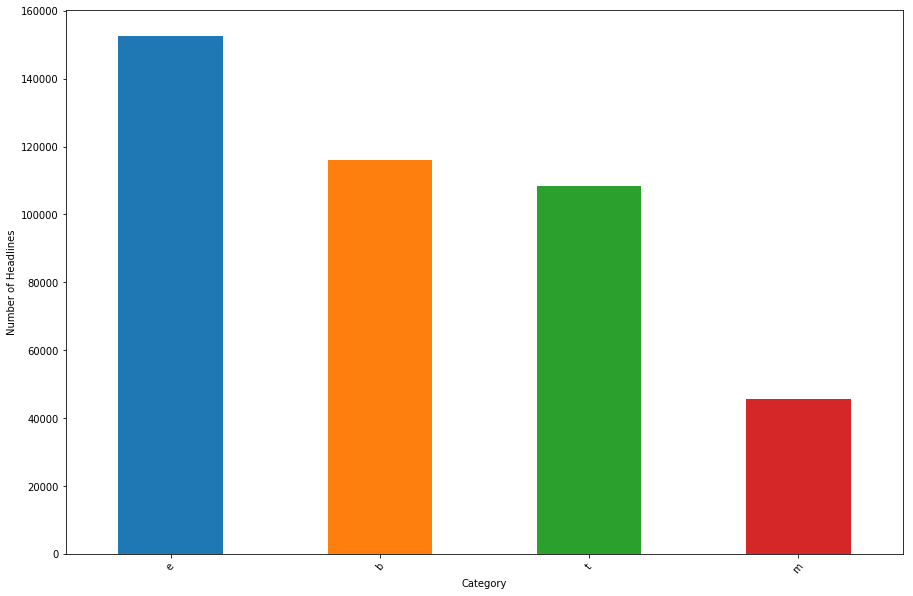

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
category.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Category")
plt.ylabel("Number of Headlines")
plt.show()

In [66]:
text = data.TITLE[0]

In [67]:
text

'Fed official says weak data caused by weather, should not slow taper'

In [68]:
wordcloud = WordCloud().generate(text)


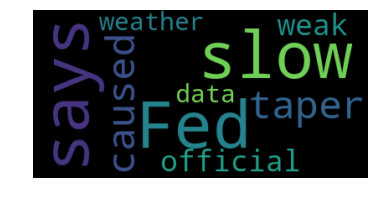

In [69]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chapsujith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [73]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [74]:
preprocess(text)

[u'offici', u'say', u'weak', u'data', u'caus', u'weather', u'slow', u'taper']

In [76]:
text=""
for j,i in data.iterrows():
    if(i['CATEGORY']=="b"):
        text+=i['TITLE']

    

In [77]:
stopwords = set(STOPWORDS)

In [78]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

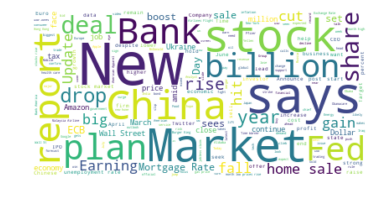

In [79]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

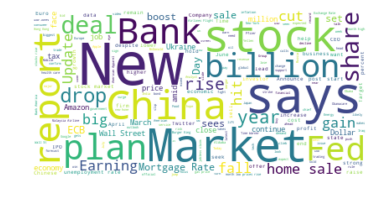

In [80]:
text=""
for j,i in data.iterrows():
    if(i['CATEGORY']=="e"):
        text+=i['TITLE']
wordcloud_e = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()    

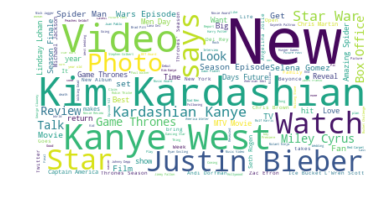

In [82]:
plt.imshow(wordcloud_e, interpolation='bilinear')
plt.axis("off")
plt.show()    

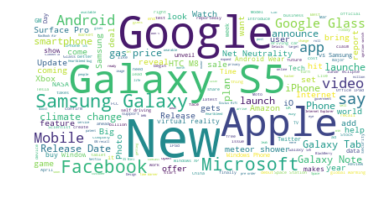

In [83]:
text=""
for j,i in data.iterrows():
    if(i['CATEGORY']=="t"):
        text+=i['TITLE']
wordcloud_t = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud_t, interpolation='bilinear')
plt.axis("off")
plt.show()    

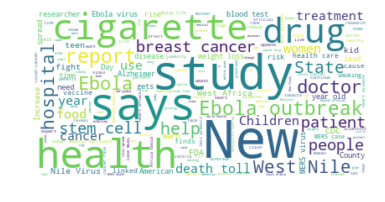

In [84]:
text=""
for j,i in data.iterrows():
    if(i['CATEGORY']=="m"):
        text+=i['TITLE']
wordcloud_m = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud_m, interpolation='bilinear')
plt.axis("off")
plt.show()    

In [85]:
text=""
for j,i in data.iterrows():
    if(i['CATEGORY']=="t"):
        text+=i['TITLE']
vocab_t=preprocess(text)

In [87]:
text=""
for j,i in data.iterrows():
    if(i['CATEGORY']=="m"):
        text+=i['TITLE']
vocab_m=preprocess(text)

In [91]:
text=""
for j,i in data.iterrows():
    if(i['CATEGORY']=="b"):
        text+=i['TITLE']
vocab_b=preprocess(text)

In [92]:
text=""
for j,i in data.iterrows():
    if(i['CATEGORY']=="e"):
        text+=i['TITLE']
vocab_e=preprocess(text)

In [93]:
print("len of tech",len(vocab_t))
print("len of med",len(vocab_m))
print("len of business",len(vocab_b))
print("len of entertainment",len(vocab_e))

('len of tech', 554111)
('len of med', 233304)
('len of business', 588212)
('len of entertainment', 870858)


In [96]:
len(list(set(vocab_b) & set(vocab_e)))

8442